# CNN2

In [5]:
# Import libraries
from imageex import generate_image_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import random

# Parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
NUM_CLASSES = 3  # Triangle, square, x
NUM_IMAGES = 1000
NUM_PATTERNS = 3




In [6]:
def create_dataset(num_images, width, height, num_classes):
    X = []
    y = []
    pattern_to_label = {'triangle': 0, 'square': 1, 'x': 2}  # Map pattern types to labels

    for _ in range(num_images):
        # Generate image and pattern types
        img_array, used_patterns = generate_image_array(width, height, random.randint(1, num_classes))
        X.append(img_array)

        # Assign a label if any of the patterns are present
        # For simplicity, assign the first pattern type's label
        # (Or extend this to handle multiple labels if needed)
        label = pattern_to_label[used_patterns[0]]
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    # Normalize images and one-hot encode labels
    X = X / 255.0  # Normalize pixel values to [0, 1]
    y = to_categorical(y, num_classes)

    return X, y




In [7]:
# Create dataset
X, y = create_dataset(NUM_IMAGES, IMG_WIDTH, IMG_HEIGHT, NUM_PATTERNS)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Output probabilities for patterns
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=16)

# Save the model
model.save("pattern_detection_model.h5")

Returning patterns: ['square']
Returning patterns: ['x', 'triangle']
Returning patterns: ['x']
Returning patterns: ['x', 'x']
Returning patterns: ['square', 'x']
Returning patterns: ['triangle', 'x']
Returning patterns: ['x', 'x', 'triangle']
Returning patterns: ['square', 'square']
Returning patterns: ['square', 'square']
Returning patterns: ['triangle', 'triangle']
Returning patterns: ['square', 'triangle', 'x']
Returning patterns: ['x', 'triangle']
Returning patterns: ['square', 'x', 'x']
Returning patterns: ['x', 'triangle']
Returning patterns: ['square', 'square', 'x']
Returning patterns: ['x', 'square', 'x']
Returning patterns: ['square', 'x']
Returning patterns: ['square']
Returning patterns: ['x', 'square', 'triangle']
Returning patterns: ['x', 'x', 'triangle']
Returning patterns: ['x', 'square', 'square']
Returning patterns: ['triangle', 'triangle']
Returning patterns: ['triangle']
Returning patterns: ['triangle', 'square', 'square']
Returning patterns: ['square', 'x', 'square

NameError: name 'to_categorical' is not defined

In [2]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2401 - loss: 4137220.5000
Test Accuracy: 26.00%


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,709 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


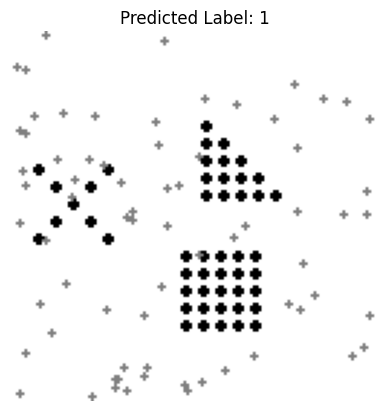

Predicted Probabilities: [0. 1. 0.]


In [3]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Charger le modèle sauvegardé
model = load_model("pattern_detection_model.h5")

# Vérifier l'architecture du modèle
model.summary()

# Exemple de prédiction sur une nouvelle image
# Supposons que `X_test` est une image du dataset de test que vous souhaitez prédire
predictions = model.predict(X_test)

# Afficher la première image et sa prédiction
plt.imshow(X_test[0])
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.axis("off")
plt.show()

# Afficher la probabilité associée à chaque classe
print("Predicted Probabilities:", predictions[0])


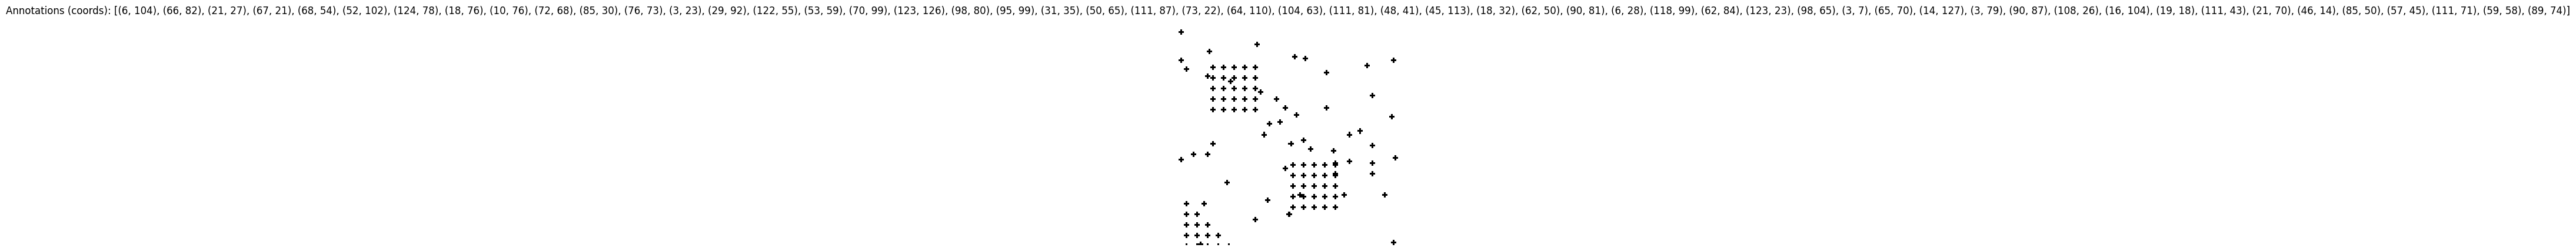

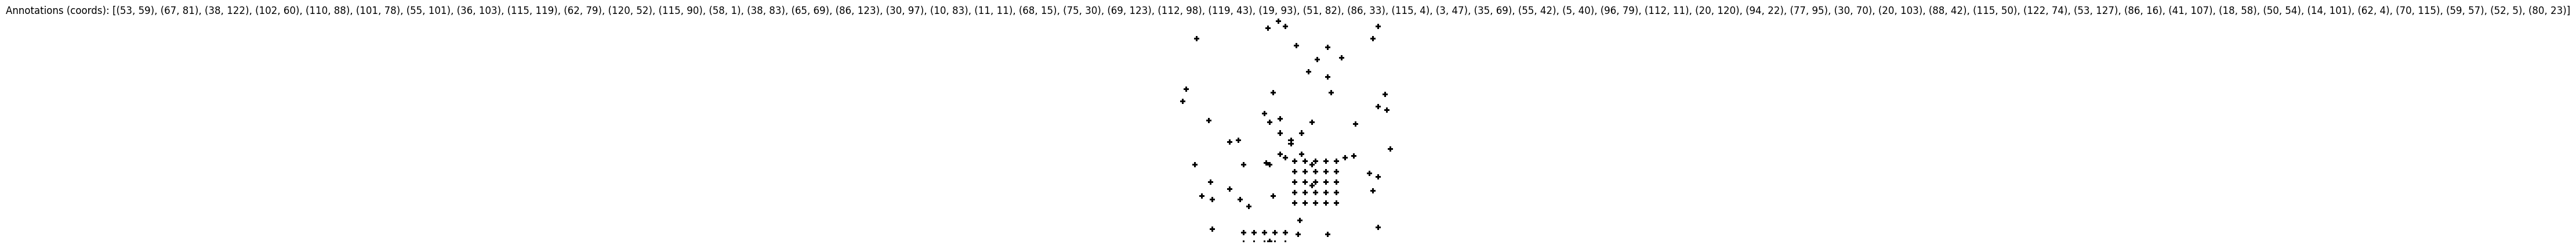

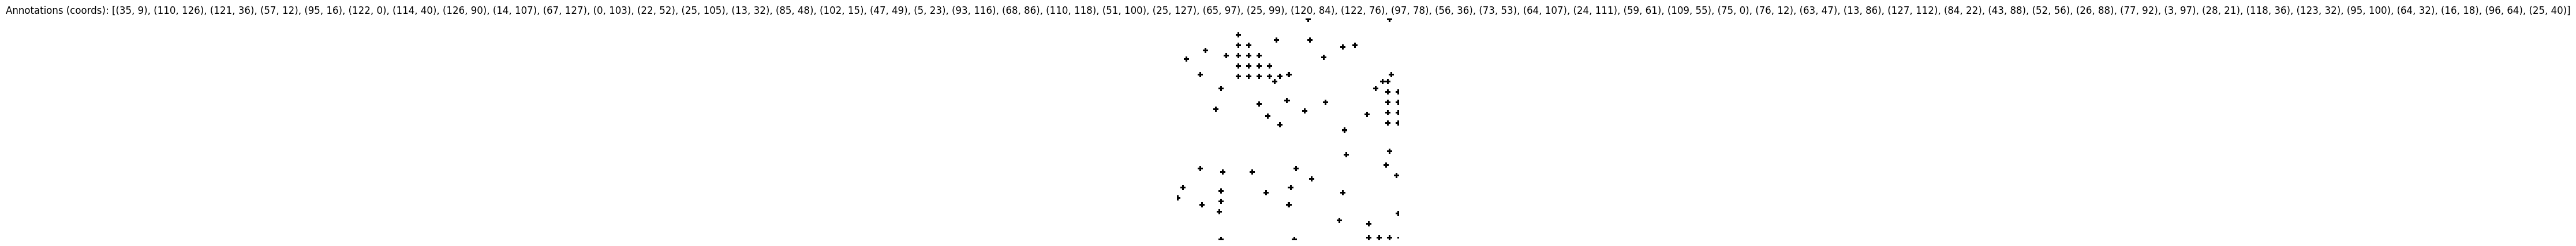

In [7]:
from imageex2 import create_bomb_dataset
import matplotlib.pyplot as plt

# Paramètres
IMG_WIDTH = 128
IMG_HEIGHT = 128
NUM_IMAGES = 5
NUM_PATTERNS = 3
NUM_NOISE_POINTS = 50
NUM_CLASSES = 3

# Générer le dataset
X, y = create_bomb_dataset(NUM_IMAGES, IMG_WIDTH, IMG_HEIGHT, NUM_PATTERNS, NUM_NOISE_POINTS)

# Visualiser une image et ses annotations
for i in range(3):  # Afficher les 3 premières images
    plt.figure(figsize=(5, 5))
    plt.imshow(X[i])
    plt.title(f"Annotations (coords): {y[i]}")
    plt.axis("off")
    plt.show()


In [12]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)


ValueError: Unrecognized data type: x=[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [0. 0. 0.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [0. 0. 0.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]] (of type <class 'numpy.ndarray'>)